# GIS5103 Final Project
**Water Infrastructure and GI Disease**  
Alexander Bedine

## Core Packages and Table of Contents

### Table of Contents
- [GI Disease Data](#gi-disease-data)
    - [Pancreatic Cancer](#pancreatic-cancer)
    - [Gastric Cancer](#gastric-cancer)
- [Water Infrastructure](#water-infrastructure)
    - [System Level Service Lines](#system-level-service-lines)
    - [Geocoding](#geocoding)
    - [Why did the Algorithm Fail?](#why-did-the-algorithm-fail)
    - [Fixing the Data Manually](#fixing-the-data-manually)
- [Analysis of Florida](#analysis-of-florida)
    - [Adding Florida Data](#adding-florida-data)
    - [Merging DataFrames](#merging-dataframes-fl)
    - [Correlations and (Possible) Causations](#correlations-and-possible-causation-fl)
    - [Spatial Autocorrelation](#spatial-autocorrelation-fl)
- [Analysis of Maryland](#analysis-of-maryland)
    - [Adding Maryland Data](#adding-maryland-data)
    - [Merging DataFrames](#merging-dataframes-md)
    - [Correlations and (Possible) Causations](#correlations-and-possible-causation-md)
    - [Spatial Autocorrelation](#spatial-autocorrelation-md)

### Importing Core Packages

In [324]:
import pandas as pd
import geopandas as gpd

## GI Disease Data

Since IBS and similar illnesses are not well reported on a county-level scale, we are going to use Pancreatic and Gastric (Stomach) Cancer as the proxies for GI Disease.

### Pancreatic Cancer

In [407]:
file = "C:/Users/alexb/Documents/GIS5103/GIS5103/Project/FL_Pancreatic Cancer incd Rates 2017-21.csv"
Pcancer_gdf = gpd.read_file(file)

Importing manually cleaned data that has pancreatic cancer incident rates for Florida (2017-21).

In [418]:
Pcancer_gdf.fillna(0)

,County,FIPS,2023 Continuum Codes,ageadj_incdrate,low95,upper95,5yr_incdtrend,low95_trend,upper95_trend
0,"Alachua County, Florida(6)",12001,Urban,15.2,13.2,17.3,2.6,1,3.7
1,"Baker County, Florida(6)",12003,Urban,13.8,8.4,21.4,-2.2,-7.2,2.9
2,"Bay County, Florida(6)",12005,Urban,13.6,11.6,15.9,9.1,1.2,17
3,"Bradford County, Florida(6)",12007,Rural,8,4.6,13.5,-1.7,-9,5.4
4,"Brevard County, Florida(6)",12009,Urban,13.7,12.7,14.9,-3.9,-9.9,0.9
...,...,...,...,...,...,...,...,...,...
62,"Union County, Florida(6)",12125,Rural,27.7,18.1,40.9,-0.3,-5,5.1
63,"Volusia County, Florida(6)",12127,Urban,14.4,13.3,15.5,1.9,0.8,3.3
64,"Wakulla County, Florida(6)",12129,Urban,13.2,8.6,19.7,NaN,NaN,NaN
65,"Walton County, Florida(6)",12131,Urban,12.3,9.5,15.9,-0.6,-4.5,4.1


Filling null entries, this will fix some issues we would otherwise run into later

In [409]:
Pcancer_fix = Pcancer_gdf.astype({
    'ageadj_incdrate': 'float',
     'low95': 'float',
     'upper95': 'float',
     '5yr_incdtrend': 'float',
     'low95_trend': 'float',
     'upper95_trend': 'float'}
)

Fixing the datatypes for the DataFrame so they can be used for proper calculations later on.

In [410]:
Pcancer_fix['COUNTY'] = Pcancer_fix['FIPS'].str[2:]

Adding a column that will be useful for merging with other DataFrames later on.

### Gastric Cancer

In [411]:
file = "C:/Users/alexb/Documents/GIS5103/GIS5103/Project/FL_stomachcancer_incd_fix.csv"
STcancer_gdf = gpd.read_file(file)

Importing manually cleaned data that has stomach cancer incident rates for Florida (2017-21).  
We will repeat the basic steps to prep the data for analysis later that we did above with pancreatic data.

In [412]:
STcancer_gdf.fillna(0)

,County,FIPS,2023 Continuum Codes,ageadj_incdrate,low95,upper95,5yr_incdtrend,low95_trend,upper95_trend
0,Alachua County(6),12001,Urban,5.8,4.6,7.2,-0.3,-1.9,1.5
1,Baker County(6),12003,Urban,NaN,NaN,NaN,NaN,NaN,NaN
2,Bay County(6),12005,Urban,5.5,4.2,7.1,-1.2,-4.3,1.8
3,Bradford County(6),12007,Rural,NaN,NaN,NaN,NaN,NaN,NaN
4,Brevard County(6),12009,Urban,5.9,5.2,6.7,0,-1.7,1.9
...,...,...,...,...,...,...,...,...,...
62,Union County(6),12125,Rural,15.9,9.1,26.2,1.7,-4.4,9.3
63,Volusia County(6),12127,Urban,5.6,4.9,6.4,-0.5,-1.8,0.9
64,Wakulla County(6),12129,Urban,NaN,NaN,NaN,NaN,NaN,NaN
65,Walton County(6),12131,Urban,3,1.7,5.1,NaN,NaN,NaN


In [413]:
STcancer_fix = STcancer_gdf.astype({
    'ageadj_incdrate': 'float',
     'low95': 'float',
     'upper95': 'float',
     '5yr_incdtrend': 'float',
     'low95_trend': 'float',
     'upper95_trend': 'float'}
)

In [414]:
STcancer_fix['COUNTY'] = STcancer_fix['FIPS'].str[2:]

## Water Infrastructure

Using Data from the 7th EPA Water Needs Survey, we can estimate what percentage of a county's water infrastructure contains lead.

### System Level Service Lines

In [333]:
file = "C:/Users/alexb/Documents/GIS5103/GIS5103/Project/updated-7th-dwinsa-system-level-service-lines-2.xlsx"
SSL_gdf = gpd.read_file(file)

In [334]:
SSL_gdf.head(2)

,Primacy Agency,PWSID,PWS Name,Reported System Size,Service Lines,1. Service lines that contain any lead pipe,2. Service lines that do not contain any lead pipe but have lead connectors,3a. Service lines that contain galvanized pipe and were previously downstream from a lead source,3b. Service lines that contain galvanized pipe that have never been downstream from any lead source,4a. Service lines that do not contain any lead pipe or galvanized pipe and that do not have lead connectors,4b. Service lines for which the material makeup of the service line and of the connector are not known,Not reported,Total
0,AK,AK2110342,CITY AND BOROUGH OF JUNEAU,Medium,9705,0,0.0,0,0,0.0,9705,0,9705
1,AK,AK2110601,SKAGWAY,Medium,375,0,0.0,0,0,0.0,0,375,375


### Geocoding

In [335]:
SSL_gdf['COUNTY_FIPS'] = SSL_gdf['PWSID'].str[3:6]

PWSID is a unique identifier for a water treatment site.  
Using this splice, we should be able to extract the correct FIPS code for the water treatment site.

In [336]:
state_fips_dict = {
    'AL': '01', 'AK': '02', 'AZ': '04', 'AR': '05', 'CA': '06',
    'CO': '08', 'CT': '09', 'DE': '10', 'FL': '12', 'GA': '13',
    'HI': '15', 'ID': '16', 'IL': '17', 'IN': '18', 'IA': '19',
    'KS': '20', 'KY': '21', 'LA': '22', 'ME': '23', 'MD': '24',
    'MA': '25', 'MI': '26', 'MN': '27', 'MS': '28', 'MO': '29',
    'MT': '30', 'NE': '31', 'NV': '32', 'NH': '33', 'NJ': '34',
    'NM': '35', 'NY': '36', 'NC': '37', 'ND': '38', 'OH': '39',
    'OK': '40', 'OR': '41', 'PA': '42', 'RI': '44', 'SC': '45',
    'SD': '46', 'TN': '47', 'TX': '48', 'UT': '49', 'VT': '50',
    'VA': '51', 'WA': '53', 'WV': '54', 'WI': '55', 'WY': '56'
}

We can create a dictionary to assign the States FIPS code to every water treatment site.

In [337]:
SSL_gdf['STATE_FIPS'] = SSL_gdf['Primacy Agency'].map(state_fips_dict)

In [338]:
SSL_gdf['FIPS'] = SSL_gdf['STATE_FIPS'] + SSL_gdf['COUNTY_FIPS']

In [339]:
SSL_gdf.head()

,Primacy Agency,PWSID,PWS Name,Reported System Size,Service Lines,1. Service lines that contain any lead pipe,2. Service lines that do not contain any lead pipe but have lead connectors,3a. Service lines that contain galvanized pipe and were previously downstream from a lead source,3b. Service lines that contain galvanized pipe that have never been downstream from any lead source,4a. Service lines that do not contain any lead pipe or galvanized pipe and that do not have lead connectors,4b. Service lines for which the material makeup of the service line and of the connector are not known,Not reported,Total,COUNTY_FIPS,STATE_FIPS,FIPS
0,AK,AK2110342,CITY AND BOROUGH OF JUNEAU,Medium,9705,0,0.0,0,0,0.0,9705,0,9705,110,02,02110
1,AK,AK2110601,SKAGWAY,Medium,375,0,0.0,0,0,0.0,0,375,375,110,02,02110
2,AK,AK2120232,KETCHIKAN PUBLIC UTILITIES,Medium,3242,0,0.0,0,0,0.0,0,3242,3242,120,02,02120
3,AK,AK2130075,SITKA,Medium,3620,0,0.0,0,0,0.0,0,3620,3620,130,02,02130
4,AK,AK2210320,FOUR SEASONS TC,Small,120,0,0.0,0,0,0.0,120,0,120,210,02,02210


Now, we could try to merge this with any county-level DataFrame, but it is going to fail. . .  
For example, we can see above that the **Four Seasons TC** PWS has the FIPS code **02210**, but no county in AK has that FIPS code. . .

### Why did the Algorithm Fail?

PWSID seemed to only work on specific entries, so we have to manually geocode this.

In [340]:
SSL_gdf.to_csv('system_level_service.csv')

Export this out so it can be manually fixed.

### Fixing the Data Manually

In [341]:
file = 'C:/Users/alexb/Documents/GIS5103/GIS5103/Project/pleasefix.csv'
SSL_gdf = gpd.read_file(file)

In [342]:
SSL_gdf = SSL_gdf.astype(
    {'Pb_Pipe': 'int',
    'Pb_Connector': 'int',
    'Galv_Pb': 'int',
    'Galv_noPb': 'int',
    'Unknown': 'int',
    'no_reports': 'int',
    'Total': 'int',
    'Total_Pb': 'int',
    'pct_Pb': 'float'}
)

In [343]:
SSL_gdf.dtypes

Primacy_Agency     object
PWSID              object
PWS_Name           object
Sys_Size           object
Pb_Pipe             int64
Pb_Connector        int64
Galv_Pb             int64
Galv_noPb           int64
Unknown             int64
no_reports          int64
Total               int64
county_fips        object
states_fips        object
Total_Pb            int64
pct_Pb            float64
dtype: object

We've manually assigned the FIPS codes for FL PWS sites and fixed the DataFrame.

## Analysis of Florida

### Adding Florida Data

In [446]:
FL_counties = gpd.read_file("C:/Users/alexb/Documents/GIS5103/GIS5103/data/Florida_Counties.geojson")

In [447]:
FL_counties.head()

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTArea,ShapeSTLength,geometry
0,1,21,041,GILCHRIST,2000-05-16 00:00:00+00:00,9.908353e+09,4.873000e+05,"POLYGON ((-82.65814 29.83028, -82.65887 29.830..."
1,2,54,107,PUTNAM,2000-05-16 00:00:00+00:00,2.305869e+10,7.629677e+05,"POLYGON ((-81.58084 29.83956, -81.60611 29.839..."
2,3,62,123,TAYLOR,2000-05-16 00:00:00+00:00,2.891747e+10,8.772527e+05,"MULTIPOLYGON (((-83.73037 30.30358, -83.73987 ..."
3,4,46,091,OKALOOSA,2000-05-16 00:00:00+00:00,2.562159e+10,1.087058e+06,"MULTIPOLYGON (((-86.39159 30.6497, -86.39157 3..."
4,5,7,013,CALHOUN,2000-05-16 00:00:00+00:00,1.604809e+10,6.313440e+05,"POLYGON ((-84.93266 30.60637, -84.95729 30.606..."


<Axes: >

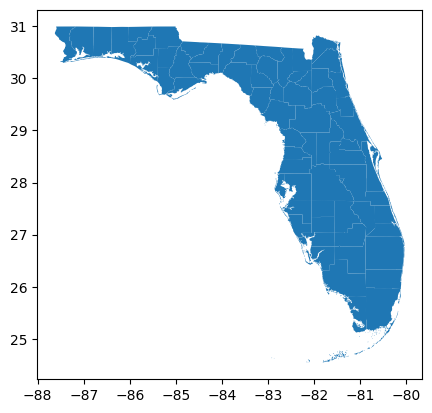

In [346]:
FL_counties.plot()

### Merging DataFrames (FL)

In [347]:
SSL_agg = SSL_gdf.groupby('county_fips').agg({
    'Total_Pb': 'sum', 
    'Total': 'sum'
}).reset_index()

We're going to aggregate our system level infrastructure data to match the level our public health data is on.

In [348]:
SSL_agg['pct_Pb'] = (SSL_agg['Total_Pb'] / SSL_agg['Total']).round(3)

Adding a column that calculates the % of the infrastructure that is leaded

In [349]:
SSL_agg.describe()

,Total_Pb,Total,pct_Pb
count,41.000000,41.000000,41.000000
mean,10263.219512,107239.926829,0.108780
std,15121.877171,136827.070677,0.115265
min,0.000000,2.000000,0.000000
25%,0.000000,15642.000000,0.000000
50%,2461.000000,49499.000000,0.076000
75%,14243.000000,120948.000000,0.173000
max,55950.000000,530295.000000,0.463000


So we have data for 41 out of 67 counties in the state of FL  
Which means the EPA either did not survey sites or there were no sites to survey in the missing 27 counties

In [350]:
FL_SSL = SSL_agg.merge(FL_counties, left_on='county_fips', right_on='COUNTY')

In [351]:
FL_SSL.head()

,county_fips,Total_Pb,Total,pct_Pb,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTArea,ShapeSTLength,geometry
0,001,18613,73013,0.255,66,1,001,ALACHUA,2000-05-16 00:00:00+00:00,2.702324e+10,8.927266e+05,"POLYGON ((-82.41869 29.92298, -82.41906 29.922..."
1,005,1080,37718,0.029,15,3,005,BAY,2000-05-16 00:00:00+00:00,2.084232e+10,1.834701e+06,"MULTIPOLYGON (((-85.38551 30.50018, -85.38528 ..."
2,007,24,255,0.094,40,4,007,BRADFORD,2000-05-16 00:00:00+00:00,8.359863e+09,5.483267e+05,"POLYGON ((-82.04939 30.14322, -82.08203 30.143..."
3,009,45766,196357,0.233,42,5,009,BREVARD,2000-05-16 00:00:00+00:00,2.893695e+10,2.600567e+06,"MULTIPOLYGON (((-80.80666 28.61413, -80.80439 ..."
4,011,55950,339989,0.165,62,6,011,BROWARD,2000-05-16 00:00:00+00:00,3.383955e+10,9.580261e+05,"MULTIPOLYGON (((-80.2268 26.33478, -80.24976 2..."


Now we have merged our lead infrastructure dataframe and our Florida Counties DataFrame

In [352]:
FL_Pcancer_SSL = pd.merge(Pcancer_fix, FL_SSL, on='COUNTY', how='inner')

In [353]:
FL_Pcancer_SSL.head()

,County,FIPS,2023 Continuum Codes,ageadj_incdrate,low95,upper95,5yr_incdtrend,low95_trend,upper95_trend,COUNTY,...,Total_Pb,Total,pct_Pb,OBJECTID,DEPCODE,COUNTYNAME,DATESTAMP,ShapeSTArea,ShapeSTLength,geometry
0,"Alachua County, Florida(6)",12001,Urban,15.2,13.2,17.3,2.6,1.0,3.7,001,...,18613,73013,0.255,66,1,ALACHUA,2000-05-16 00:00:00+00:00,2.702324e+10,8.927266e+05,"POLYGON ((-82.41869 29.92298, -82.41906 29.922..."
1,"Bay County, Florida(6)",12005,Urban,13.6,11.6,15.9,9.1,1.2,17.0,005,...,1080,37718,0.029,15,3,BAY,2000-05-16 00:00:00+00:00,2.084232e+10,1.834701e+06,"MULTIPOLYGON (((-85.38551 30.50018, -85.38528 ..."
2,"Bradford County, Florida(6)",12007,Rural,8.0,4.6,13.5,-1.7,-9.0,5.4,007,...,24,255,0.094,40,4,BRADFORD,2000-05-16 00:00:00+00:00,8.359863e+09,5.483267e+05,"POLYGON ((-82.04939 30.14322, -82.08203 30.143..."
3,"Brevard County, Florida(6)",12009,Urban,13.7,12.7,14.9,-3.9,-9.9,0.9,009,...,45766,196357,0.233,42,5,BREVARD,2000-05-16 00:00:00+00:00,2.893695e+10,2.600567e+06,"MULTIPOLYGON (((-80.80666 28.61413, -80.80439 ..."
4,"Broward County, Florida(6)",12011,Urban,13.1,12.5,13.8,0.4,-0.4,1.2,011,...,55950,339989,0.165,62,6,BROWARD,2000-05-16 00:00:00+00:00,3.383955e+10,9.580261e+05,"MULTIPOLYGON (((-80.2268 26.33478, -80.24976 2..."


Now we have merged our lead infrastructure data with our pancreatic cancer data.

In [354]:
FL_Pcancer_SSL = gpd.GeoDataFrame(FL_Pcancer_SSL, geometry=FL_Pcancer_SSL['geometry'])

Since the DataFrame was migrated to a pandas DF when we did the merge, we are going to use this code to turn it back into a GeoDataFrame

In [355]:
FL_STcancer_SSL = pd.merge(STcancer_fix, FL_SSL, on='COUNTY', how='inner')

In [356]:
FL_STcancer_SSL.head()

,County,FIPS,2023 Continuum Codes,ageadj_incdrate,low95,upper95,5yr_incdtrend,low95_trend,upper95_trend,COUNTY,...,Total_Pb,Total,pct_Pb,OBJECTID,DEPCODE,COUNTYNAME,DATESTAMP,ShapeSTArea,ShapeSTLength,geometry
0,Alachua County(6),12001,Urban,5.8,4.6,7.2,-0.3,-1.9,1.5,001,...,18613,73013,0.255,66,1,ALACHUA,2000-05-16 00:00:00+00:00,2.702324e+10,8.927266e+05,"POLYGON ((-82.41869 29.92298, -82.41906 29.922..."
1,Bay County(6),12005,Urban,5.5,4.2,7.1,-1.2,-4.3,1.8,005,...,1080,37718,0.029,15,3,BAY,2000-05-16 00:00:00+00:00,2.084232e+10,1.834701e+06,"MULTIPOLYGON (((-85.38551 30.50018, -85.38528 ..."
2,Bradford County(6),12007,Rural,NaN,NaN,NaN,NaN,NaN,NaN,007,...,24,255,0.094,40,4,BRADFORD,2000-05-16 00:00:00+00:00,8.359863e+09,5.483267e+05,"POLYGON ((-82.04939 30.14322, -82.08203 30.143..."
3,Brevard County(6),12009,Urban,5.9,5.2,6.7,0.0,-1.7,1.9,009,...,45766,196357,0.233,42,5,BREVARD,2000-05-16 00:00:00+00:00,2.893695e+10,2.600567e+06,"MULTIPOLYGON (((-80.80666 28.61413, -80.80439 ..."
4,Broward County(6),12011,Urban,7.0,6.5,7.5,-0.8,-1.5,0.0,011,...,55950,339989,0.165,62,6,BROWARD,2000-05-16 00:00:00+00:00,3.383955e+10,9.580261e+05,"MULTIPOLYGON (((-80.2268 26.33478, -80.24976 2..."


Now we have a 2nd DataFrame that merges our lead infrastructure data with our stomach cancer data.

In [357]:
FL_STcancer_SSL = gpd.GeoDataFrame(FL_STcancer_SSL, geometry=FL_STcancer_SSL['geometry'])

### Correlations and (Possible) Causation (FL)

In [463]:
import matplotlib.pyplot as plt
import numpy as np

Import some new packages to create some charts and plots

In [359]:
Pcancer_Lead = FL_Pcancer_SSL['pct_Pb'].corr(FL_Pcancer_SSL['ageadj_incdrate'])

In [360]:
Pcancer_Lead

np.float64(0.04940208190951645)

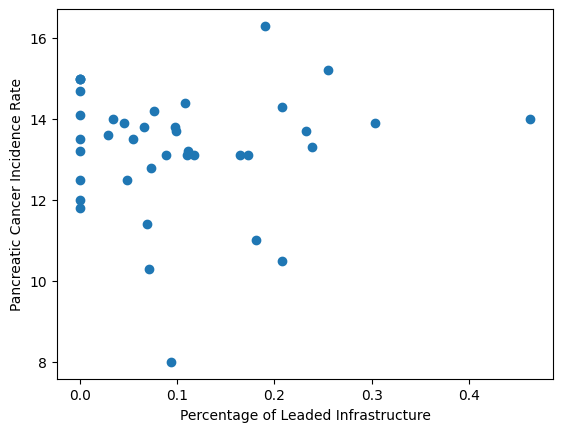

In [361]:
data = FL_Pcancer_SSL[['pct_Pb', 'ageadj_incdrate']]
x = data['pct_Pb']
y = data['ageadj_incdrate']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x,p(x),"r--")
plt.xlabel("Percentage of Leaded Infrastructure")
plt.ylabel("Pancreatic Cancer Incidence Rate")

plt.savefig('FL_PCancerplot.png')
plt.show()

So lead infrastructure does not appear to correlate with Pancreatic Cancer rates.

In [362]:
STcancer_Lead = FL_STcancer_SSL['pct_Pb'].corr(FL_STcancer_SSL['ageadj_incdrate'])

In [363]:
STcancer_Lead

np.float64(0.14312933073524425)

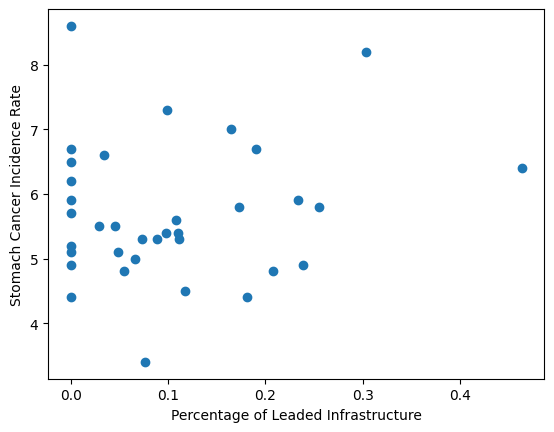

In [364]:
data = FL_STcancer_SSL[['pct_Pb', 'ageadj_incdrate']]
x = data['pct_Pb']
y = data['ageadj_incdrate']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x,p(x),"r--")
plt.xlabel("Percentage of Leaded Infrastructure")
plt.ylabel("Stomach Cancer Incidence Rate")

plt.savefig('FL_STCancerplot.png')
plt.show()

So lead infrastructure correlates *slightly* stronger with stomach cancer rates, but still too low to be significant.

### Spatial Autocorrelation (FL)

In [539]:
from libpysal.weights.contiguity import Queen, Rook
import splot
from splot.esda import moran_scatterplot,plot_moran,lisa_cluster
from esda.moran import Moran, Moran_Local, Moran_Local_BV

Import some new packages to use for SA.

We're going to do some Bivariate Analysis with our variables

In [366]:
w = Queen.from_dataframe(FL_Pcancer_SSL)

C:\Users\alexb\AppData\Local\Temp\ipykernel_8024\2885422225.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(FL_Pcancer_SSL)
c:\Users\alexb\Documents\GIS5103\GIS5103\.conda\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There is 1 island with id: 20.
  W.__init__(self, neighbors, ids=ids, **kw)


In [367]:
w.transform = 'r'

('WARNING: ', 20, ' is an island (no neighbors)')


Exception: one or more input arrays have missing/NaN values

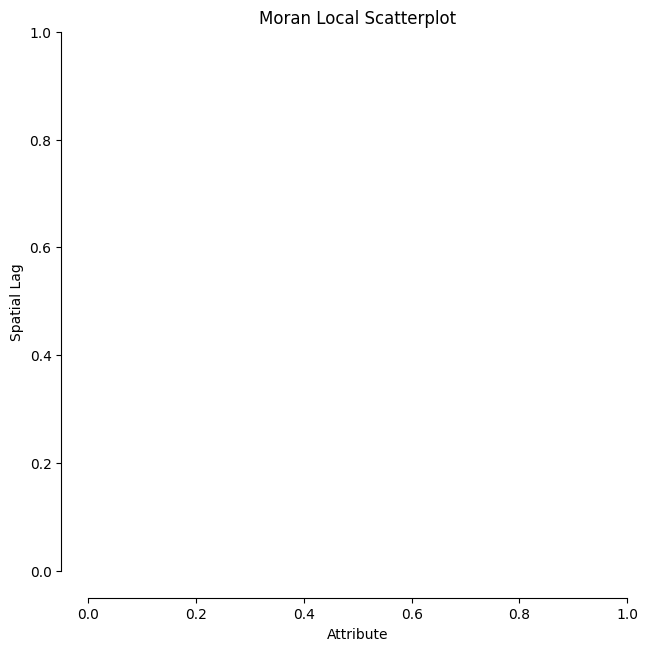

In [368]:
x = FL_Pcancer_SSL['pct_Pb'].values
y = FL_Pcancer_SSL['ageadj_incdrate'].values

moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)

ax.set_xlabel('Pancreatic Cancer Incidence Rates')
ax.set_ylabel('Spatial Lag of Pancreatic Cancer Rates')
plt.show()

('WARNING: ', 20, ' is an island (no neighbors)')


Exception: one or more input arrays have missing/NaN values

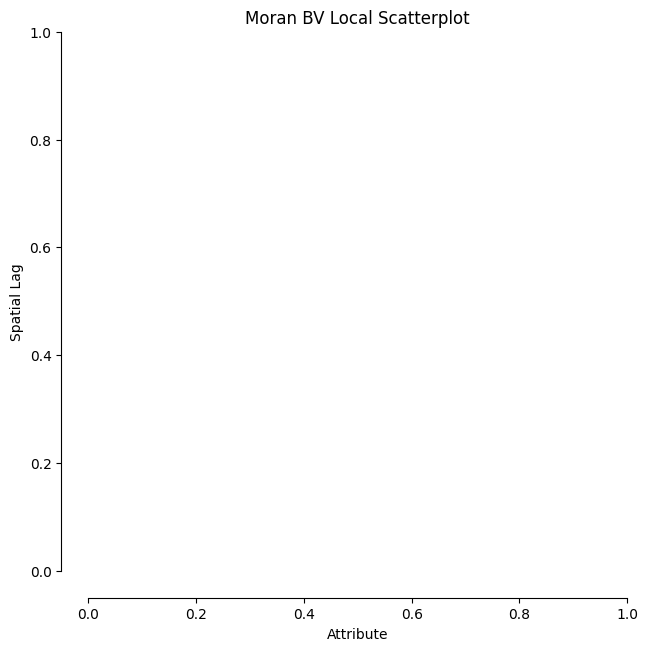

In [ ]:
x = FL_Pcancer_SSL['pct_Pb'].values
y = FL_Pcancer_SSL['ageadj_incdrate'].values

moran_loc_bv = Moran_Local_BV(x, y, w)

fig, ax = moran_scatterplot(moran_loc_bv, p=0.05,zstandard=False)


ax.set_xlabel('% of Leaded Infrastructure')
ax.set_ylabel('Averaged Incidence Rates in the Close Neighborhood')

Yeah so our SA calculations fail for unknown reasons

## Analysis of Maryland

We're going to also run up some analysis using the state of MD for two reasons:
1. it has relatively complete (non suppressed) cancer data for *all* counties.
2. it has relatively few counties, so it was easy to geocode manually.

### Adding Maryland Data

In [369]:
file = 'C:/Users/alexb/Documents/GIS5103/GIS5103/Project/MD_system_level_service.csv'
SSL_gdf = gpd.read_file(file)

In [370]:
SSL_gdf = SSL_gdf.astype(
    {'Pb_Pipe': 'int',
    'Pb_Connector': 'int',
    'Galv_Pb': 'int',
    'Galv_noPb': 'int',
    'Unknown': 'int',
    'no_reports': 'int',
    'Total': 'int',
    'Total_Pb': 'int',
    'pct_Pb': 'float'}
)

In [371]:
SSL_gdf.dtypes

Primacy_Agency     object
PWSID              object
PWS_Name           object
Sys_Size           object
Pb_Pipe             int64
Pb_Connector        int64
Galv_Pb             int64
Galv_noPb           int64
Unknown             int64
no_reports          int64
Total               int64
county_fips        object
states_fips        object
Total_Pb            int64
pct_Pb            float64
dtype: object

Above is the infrastructure data for Maryland

In [372]:
file = "C:/Users/alexb/Documents/GIS5103/GIS5103/Project/MD_PCancer.csv"
Pcancer_gdf = gpd.read_file(file)

In [373]:
Pcancer_gdf.fillna(0);

In [374]:
Pcancer_fix = Pcancer_gdf.astype({
    'ageadj_incdrate': 'float',
     'low95': 'float',
     'upper95': 'float',
     '5yr_incdtrend': 'float',
     'low95_trend': 'float',
     'upper95_trend': 'float'}
)

In [375]:
Pcancer_fix['COUNTY'] = Pcancer_fix['FIPS'].str[2:]

In [376]:
Pcancer_fix

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),ageadj_incdrate,low95,upper95,5yr_incdtrend,low95_trend,upper95_trend,COUNTY
0,Baltimore City(6),24510,Urban,17.4,16.0,18.9,0.9,-0.1,2.0,510
1,Somerset County(6),24039,Urban,16.3,10.4,24.5,NaN,NaN,NaN,039
2,Charles County(6),24017,Urban,15.5,13.0,18.5,2.3,0.5,4.4,017
3,Wicomico County(6),24045,Urban,15.1,12.1,18.5,1.6,-1.2,4.7,045
4,Cecil County(6),24015,Urban,14.5,11.7,17.9,0.2,-3.8,2.6,015
5,St. Marys County(6),24037,Urban,14.3,11.5,17.7,0.9,-2.0,4.4,037
6,Talbot County(6),24041,Rural,14.2,10.4,19.3,3.7,0.5,7.6,041
7,Worcester County(6),24047,Rural,14.2,10.9,18.4,2.2,-2.2,6.9,047
8,Anne Arundel County(6),24003,Urban,14.2,12.9,15.5,0.7,-0.5,2.1,003
9,Calvert County(6),24009,Urban,14.1,11.2,17.7,2.1,-0.9,6.0,009


In [377]:
file = "C:/Users/alexb/Documents/GIS5103/GIS5103/Project/MD_STCancer.csv"
STcancer_gdf = gpd.read_file(file)

In [378]:
STcancer_gdf.fillna(0);

In [379]:
STcancer_fix = STcancer_gdf.astype({
    'ageadj_incdrate': 'float',
     'low95': 'float',
     'upper95': 'float',
     '5yr_incdtrend': 'float',
     'low95_trend': 'float',
     'upper95_trend': 'float'}
)

In [380]:
STcancer_fix['COUNTY'] = STcancer_fix['FIPS'].str[2:]

We've now integrated our DataFrames for GI Diseases.

In [442]:
MD_counties = gpd.read_file("C:/Users/alexb/Documents/GIS5103/GIS5103/Project/MD_Counties.geojson")

In [443]:
MD_counties.head()

,OBJECTID,COUNTY,DISTRICT,COUNTY_FIP,COUNTYNUM,CREATION_D,LAST_UPDAT,Shape_Length,Shape_Area,geometry
0,1,Allegany,6.0,1,1,2010-01-28 00:00:00+00:00,2010-01-28 00:00:00+00:00,3.814949,0.115028,"MULTIPOLYGON (((-78.34284 39.72224, -78.34303 ..."
1,2,Anne Arundel,5.0,3,2,2006-04-18 00:00:00+00:00,2006-04-18 00:00:00+00:00,10.040214,0.111483,"MULTIPOLYGON (((-76.606 39.22913, -76.60503 39..."
2,3,Baltimore,4.0,5,3,2006-10-09 00:00:00+00:00,2006-10-09 00:00:00+00:00,9.470194,0.162506,"MULTIPOLYGON (((-76.56796 39.68592, -76.56795 ..."
3,4,Baltimore City,0.0,510,24,2006-04-18 00:00:00+00:00,2009-11-16 00:00:00+00:00,1.978908,0.021987,"MULTIPOLYGON (((-76.52967 39.37196, -76.52975 ..."
4,5,Calvert,5.0,9,4,2010-01-28 00:00:00+00:00,2010-01-28 00:00:00+00:00,3.576389,0.057350,"MULTIPOLYGON (((-76.64212 38.76921, -76.64191 ..."


In [444]:
MD_counties['FIPS'] = MD_counties['COUNTY_FIP'].astype(str).str.zfill(3)

We want to make a column that has the FULL county fip code (3 characters) since that is the format of our fips code in other dataframes.

In [445]:
MD_counties.head()

,OBJECTID,COUNTY,DISTRICT,COUNTY_FIP,COUNTYNUM,CREATION_D,LAST_UPDAT,Shape_Length,Shape_Area,geometry,FIPS
0,1,Allegany,6.0,1,1,2010-01-28 00:00:00+00:00,2010-01-28 00:00:00+00:00,3.814949,0.115028,"MULTIPOLYGON (((-78.34284 39.72224, -78.34303 ...",001
1,2,Anne Arundel,5.0,3,2,2006-04-18 00:00:00+00:00,2006-04-18 00:00:00+00:00,10.040214,0.111483,"MULTIPOLYGON (((-76.606 39.22913, -76.60503 39...",003
2,3,Baltimore,4.0,5,3,2006-10-09 00:00:00+00:00,2006-10-09 00:00:00+00:00,9.470194,0.162506,"MULTIPOLYGON (((-76.56796 39.68592, -76.56795 ...",005
3,4,Baltimore City,0.0,510,24,2006-04-18 00:00:00+00:00,2009-11-16 00:00:00+00:00,1.978908,0.021987,"MULTIPOLYGON (((-76.52967 39.37196, -76.52975 ...",510
4,5,Calvert,5.0,9,4,2010-01-28 00:00:00+00:00,2010-01-28 00:00:00+00:00,3.576389,0.057350,"MULTIPOLYGON (((-76.64212 38.76921, -76.64191 ...",009


verify our new column

<Axes: >

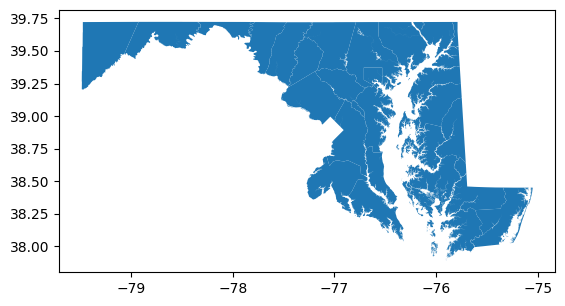

In [385]:
MD_counties.plot()

### Merging DataFrames (MD)

In [386]:
SSL_agg = SSL_gdf.groupby('county_fips').agg({
    'Total_Pb': 'sum', 
    'Total': 'sum'
}).reset_index()

In [387]:
SSL_agg['pct_Pb'] = (SSL_agg['Total_Pb'] / SSL_agg['Total']).round(3)

In [388]:
SSL_agg.describe()

,Total_Pb,Total,pct_Pb
count,18.000000,18.000000,18.000000
mean,3466.166667,97236.666667,0.030500
std,12054.494457,169673.603463,0.056956
min,0.000000,2132.000000,0.000000
25%,0.000000,10416.000000,0.000000
50%,62.500000,17785.500000,0.002000
75%,1381.500000,62360.500000,0.039750
max,51610.000000,506540.000000,0.227000


We have data for 18 out of 24 counties

In [389]:
MD_SSL = SSL_agg.merge(MD_counties, left_on='county_fips', right_on='FIPS')

In [390]:
MD_SSL.head()

,county_fips,Total_Pb,Total,pct_Pb,OBJECTID,COUNTY,DISTRICT,COUNTY_FIP,COUNTYNUM,CREATION_D,LAST_UPDAT,Shape_Length,Shape_Area,geometry,FIPS
0,001,0,11591,0.000,1,Allegany,6.0,1,1,2010-01-28 00:00:00+00:00,2010-01-28 00:00:00+00:00,3.814949,0.115028,"MULTIPOLYGON (((-78.34284 39.72224, -78.34303 ...",001
1,003,1894,34465,0.055,2,Anne Arundel,5.0,3,2,2006-04-18 00:00:00+00:00,2006-04-18 00:00:00+00:00,10.040214,0.111483,"MULTIPOLYGON (((-76.606 39.22913, -76.60503 39...",003
2,005,0,439293,0.000,3,Baltimore,4.0,5,3,2006-10-09 00:00:00+00:00,2006-10-09 00:00:00+00:00,9.470194,0.162506,"MULTIPOLYGON (((-76.56796 39.68592, -76.56795 ...",005
3,009,0,3899,0.000,5,Calvert,5.0,9,4,2010-01-28 00:00:00+00:00,2010-01-28 00:00:00+00:00,3.576389,0.057350,"MULTIPOLYGON (((-76.64212 38.76921, -76.64191 ...",009
4,013,125,18728,0.007,7,Carroll,7.0,13,6,2008-06-16 00:00:00+00:00,2012-01-17 00:00:00+00:00,3.179273,0.122033,"MULTIPOLYGON (((-76.86867 39.49261, -76.86904 ...",013


In [391]:
MD_Pcancer_SSL = pd.merge(Pcancer_fix, MD_SSL, left_on='COUNTY', right_on='FIPS', how='inner')

In [392]:
MD_Pcancer_SSL.head()

,County,FIPS_x,2023 Rural-Urban Continuum Codes([rural urban note]),ageadj_incdrate,low95,upper95,5yr_incdtrend,low95_trend,upper95_trend,COUNTY_x,...,COUNTY_y,DISTRICT,COUNTY_FIP,COUNTYNUM,CREATION_D,LAST_UPDAT,Shape_Length,Shape_Area,geometry,FIPS_y
0,Baltimore City(6),24510,Urban,17.4,16.0,18.9,0.9,-0.1,2.0,510,...,Baltimore City,0.0,510,24,2006-04-18 00:00:00+00:00,2009-11-16 00:00:00+00:00,1.978908,0.021987,"MULTIPOLYGON (((-76.52967 39.37196, -76.52975 ...",510
1,Charles County(6),24017,Urban,15.5,13.0,18.5,2.3,0.5,4.4,017,...,Charles,5.0,17,8,2009-06-08 00:00:00+00:00,2009-06-08 00:00:00+00:00,5.004585,0.123129,"MULTIPOLYGON (((-77.07823 38.69004, -77.07788 ...",017
2,Wicomico County(6),24045,Urban,15.1,12.1,18.5,1.6,-1.2,4.7,045,...,Wicomico,1.0,45,22,2007-11-26 00:00:00+00:00,2007-11-26 00:00:00+00:00,6.206751,0.100346,"MULTIPOLYGON (((-75.7015 38.55978, -75.70101 3...",045
3,Cecil County(6),24015,Urban,14.5,11.7,17.9,0.2,-3.8,2.6,015,...,Cecil,2.0,15,7,2006-04-18 00:00:00+00:00,2008-08-20 00:00:00+00:00,6.069369,0.094686,"MULTIPOLYGON (((-75.82727 39.69693, -75.82726 ...",015
4,St. Marys County(6),24037,Urban,14.3,11.5,17.7,0.9,-2.0,4.4,037,...,St. Mary's,5.0,37,18,2006-12-21 00:00:00+00:00,2007-04-10 00:00:00+00:00,7.775104,0.095964,"MULTIPOLYGON (((-76.75275 38.51376, -76.75234 ...",037


In [393]:
MD_Pcancer_SSL = gpd.GeoDataFrame(MD_Pcancer_SSL, geometry=MD_Pcancer_SSL['geometry'])

In [394]:
MD_STcancer_SSL = pd.merge(STcancer_fix, MD_SSL, left_on='COUNTY', right_on='FIPS', how='inner')

In [395]:
MD_STcancer_SSL.head()

,County,FIPS_x,2023 Rural-Urban Continuum Codes([rural urban note]),ageadj_incdrate,low95,upper95,5yr_incdtrend,low95_trend,upper95_trend,COUNTY_x,...,COUNTY_y,DISTRICT,COUNTY_FIP,COUNTYNUM,CREATION_D,LAST_UPDAT,Shape_Length,Shape_Area,geometry,FIPS_y
0,Baltimore City(6),24510,Urban,9.0,7.9,10.1,-0.3,-1.6,1.0,510,...,Baltimore City,0.0,510,24,2006-04-18 00:00:00+00:00,2009-11-16 00:00:00+00:00,1.978908,0.021987,"MULTIPOLYGON (((-76.52967 39.37196, -76.52975 ...",510
1,Dorchester County(6),24019,Rural,8.7,5.3,13.8,NaN,NaN,NaN,019,...,Dorchester,1.0,19,9,2007-02-08 00:00:00+00:00,2007-02-22 00:00:00+00:00,25.068431,0.145041,"MULTIPOLYGON (((-75.81565 38.69825, -75.81515 ...",019
2,St. Marys County(6),24037,Urban,8.4,6.3,11.0,0.3,-4.4,5.9,037,...,St. Mary's,5.0,37,18,2006-12-21 00:00:00+00:00,2007-04-10 00:00:00+00:00,7.775104,0.095964,"MULTIPOLYGON (((-76.75275 38.51376, -76.75234 ...",037
3,Wicomico County(6),24045,Urban,7.9,5.7,10.6,3.4,0.5,7.1,045,...,Wicomico,1.0,45,22,2007-11-26 00:00:00+00:00,2007-11-26 00:00:00+00:00,6.206751,0.100346,"MULTIPOLYGON (((-75.7015 38.55978, -75.70101 3...",045
4,Charles County(6),24017,Urban,7.9,6.1,10.0,0.5,-2.6,4.3,017,...,Charles,5.0,17,8,2009-06-08 00:00:00+00:00,2009-06-08 00:00:00+00:00,5.004585,0.123129,"MULTIPOLYGON (((-77.07823 38.69004, -77.07788 ...",017


In [396]:
MD_STcancer_SSL = gpd.GeoDataFrame(MD_STcancer_SSL, geometry=MD_STcancer_SSL['geometry'])

### Correlations and (Possible) Causation (MD)

In [397]:
Pcancer_Lead = MD_Pcancer_SSL['pct_Pb'].corr(MD_Pcancer_SSL['ageadj_incdrate'])

In [398]:
Pcancer_Lead

np.float64(-0.09703632601031083)

We have a negative correlation for Pancreatic Cancer rates and lead pipe infrastructure.

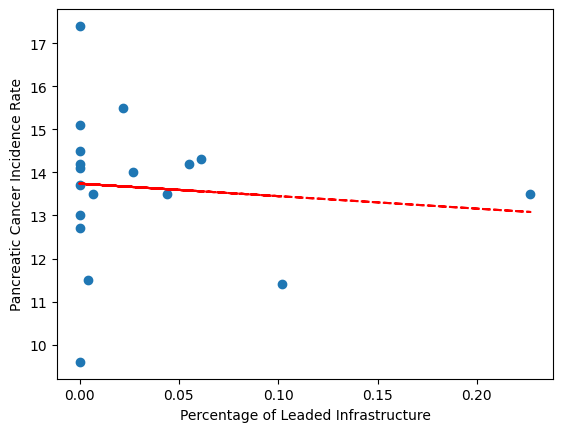

In [399]:
data = MD_Pcancer_SSL[['pct_Pb', 'ageadj_incdrate']]
x = data['pct_Pb']
y = data['ageadj_incdrate']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x,p(x),"r--")
plt.xlabel("Percentage of Leaded Infrastructure")
plt.ylabel("Pancreatic Cancer Incidence Rate")

plt.savefig('MD_PCancerplot.png')
plt.show()

In [400]:
STcancer_Lead = MD_STcancer_SSL['pct_Pb'].corr(MD_STcancer_SSL['ageadj_incdrate'])

In [401]:
STcancer_Lead

np.float64(0.33936893361124865)

This is the strongest correlation we've seen so far, but it's still not significant

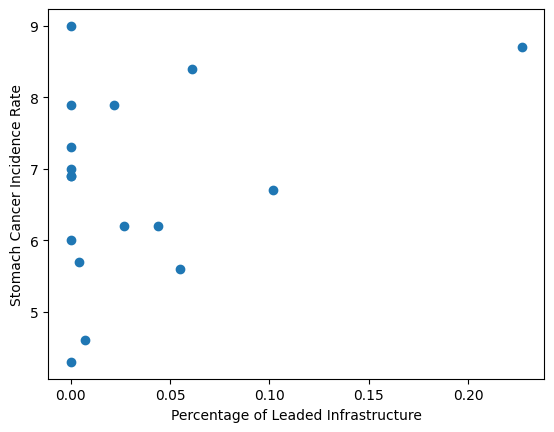

In [405]:
data = MD_STcancer_SSL[['pct_Pb', 'ageadj_incdrate']]
x = data['pct_Pb']
y = data['ageadj_incdrate']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x,p(x),"r--")
plt.xlabel("Percentage of Leaded Infrastructure")
plt.ylabel("Stomach Cancer Incidence Rate")

plt.savefig('MD_STCancerplot.png')
plt.show()

### Spatial Autocorrelation (MD)

In [403]:
w = Queen.from_dataframe(MD_Pcancer_SSL)
w.transform = 'r'

C:\Users\alexb\AppData\Local\Temp\ipykernel_8024\3344988747.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(MD_Pcancer_SSL)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')


c:\Users\alexb\Documents\GIS5103\GIS5103\.conda\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 5 islands with ids: 1, 4, 11, 14, 16.
  W.__init__(self, neighbors, ids=ids, **kw)


c:\Users\alexb\Documents\GIS5103\GIS5103\.conda\Lib\site-packages\esda\moran.py:1426: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


Text(0, 0.5, 'Averaged Incidence Rates in the Close Neighborhood')

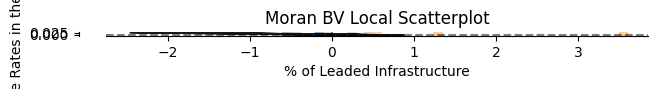

In [404]:
x = MD_Pcancer_SSL['pct_Pb'].values
y = MD_Pcancer_SSL['ageadj_incdrate'].values

moran_loc_bv = Moran_Local_BV(x, y, w)

fig, ax = moran_scatterplot(moran_loc_bv, p=0.05,zstandard=False)


ax.set_xlabel('% of Leaded Infrastructure')
ax.set_ylabel('Averaged Incidence Rates in the Close Neighborhood')

## Future Research

### Pancreatic Cancer Heatmap

In [540]:
FL_Pcancer = gpd.read_file("C:/Users/alexb/Documents/GIS5103/GIS5103/Project/FL_Pancreatic Cancer incd Rates 2017-21.csv")
MD_Pcancer = gpd.read_file("C:/Users/alexb/Documents/GIS5103/GIS5103/Project/MD_PCancer.csv")

In [541]:
FL_Pcancer.fillna(0)
MD_Pcancer.fillna(0);

In [542]:
FL_Pcancer = FL_Pcancer.astype({
    'ageadj_incdrate': 'float',
     'low95': 'float',
     'upper95': 'float',
     '5yr_incdtrend': 'float',
     'low95_trend': 'float',
     'upper95_trend': 'float'}
)

In [543]:
MD_Pcancer = MD_Pcancer.astype({
    'ageadj_incdrate': 'float',
     'low95': 'float',
     'upper95': 'float',
     '5yr_incdtrend': 'float',
     'low95_trend': 'float',
     'upper95_trend': 'float'}
)

In [544]:
FL_Pcancer["COUNTY_FIPS"] = FL_Pcancer["FIPS"].str[2:]
MD_Pcancer["COUNTY_FIPS"] = MD_Pcancer["FIPS"].str[2:]

In [545]:
FL_Pcancer_gdf = pd.merge(FL_counties, FL_Pcancer, left_on='COUNTY', right_on='COUNTY_FIPS', how='inner')
MD_Pcancer_gdf = pd.merge(MD_counties, MD_Pcancer, left_on='FIPS', right_on='COUNTY_FIPS', how='inner')

In [546]:
FL_Pcancer_gdf = gpd.GeoDataFrame(FL_Pcancer_gdf, geometry=FL_Pcancer_gdf['geometry'])
MD_Pcancer_gdf = gpd.GeoDataFrame(MD_Pcancer_gdf, geometry=MD_Pcancer_gdf['geometry'])

Alright we have no created a DataFrame that merges the Pancreatic Cancer data and county level geometries for Florida and Maryland.

In [547]:
FL_P_w = Rook.from_dataframe(FL_Pcancer_gdf)
FL_P_w.transform = 'r'

MD_P_w = Rook.from_dataframe(MD_Pcancer_gdf)
MD_P_w.transform = 'r';

C:\Users\alexb\AppData\Local\Temp\ipykernel_8024\962315978.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  FL_P_w = Rook.from_dataframe(FL_Pcancer_gdf)


C:\Users\alexb\AppData\Local\Temp\ipykernel_8024\962315978.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  MD_P_w = Rook.from_dataframe(MD_Pcancer_gdf)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')


c:\Users\alexb\Documents\GIS5103\GIS5103\.conda\Lib\site-packages\libpysal\weights\contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 4 islands with ids: 0, 11, 15, 19.
  W.__init__(self, neighbors, ids=ids, **kw)


Get our weights for our hot and cold spot maps  
transform for row-standardization

In [548]:
FL_Pcancer_rate = FL_Pcancer_gdf['ageadj_incdrate'].values
MD_Pcancer_rate = MD_Pcancer_gdf['ageadj_incdrate'].values

FL_P_global_moran = Moran(FL_Pcancer_rate, FL_P_w)
MD_P_global_moran = Moran(MD_Pcancer_rate, MD_P_w)

In [549]:
FL_P_global_moran.p_sim

np.float64(0.001)

In [550]:
MD_P_global_moran.p_sim

np.float64(0.237)

Our FL data appears to be significant, unlike our MD data

In [551]:
FL_P_moran_local = Moran_Local(FL_Pcancer_rate, FL_P_w)
MD_P_moran_local = Moran_Local(MD_Pcancer_rate, MD_P_w);

c:\Users\alexb\Documents\GIS5103\GIS5103\.conda\Lib\site-packages\esda\moran.py:1084: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


Text(0.5, 0.98, 'Hot and Cold Spots of Pancreatic Cancer Rates in Florida and Maryland (2017-21)')

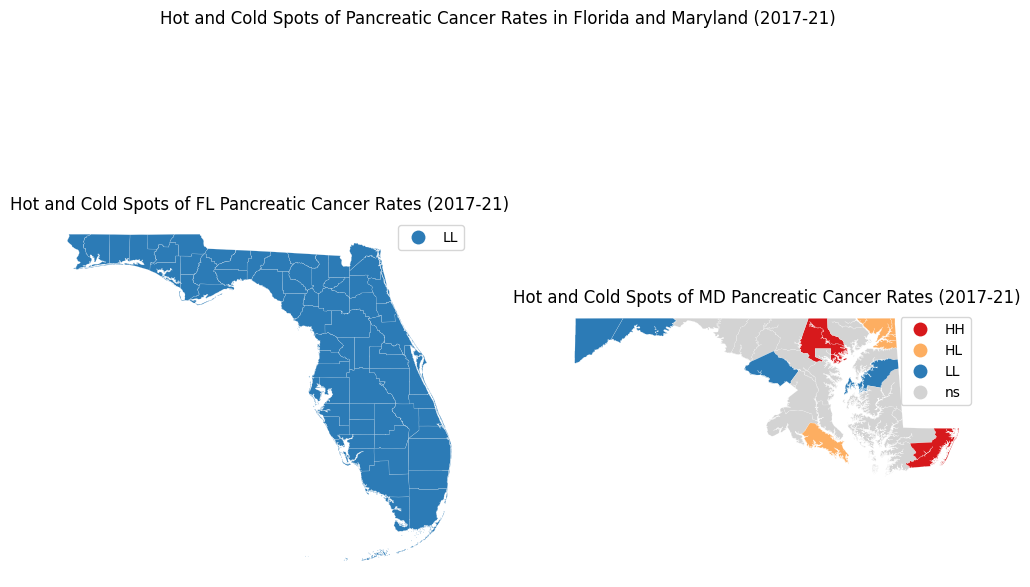

In [552]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

lisa_cluster(ax=axs[0],
             moran_loc = FL_P_moran_local,
             gdf = FL_Pcancer_gdf,
             p = 0.05,
             figsize = (12,8)
             )
axs[0].set_title("Hot and Cold Spots of FL Pancreatic Cancer Rates (2017-21)")

lisa_cluster(ax=axs[1],
             moran_loc = MD_P_moran_local,
             gdf = MD_Pcancer_gdf,
             p = 0.05,
             figsize = (12,8)
             )
axs[1].set_title("Hot and Cold Spots of MD Pancreatic Cancer Rates (2017-21)")

fig.suptitle('Hot and Cold Spots of Pancreatic Cancer Rates in Florida and Maryland (2017-21)')

### Gastric Cancer Heatmap

In [553]:
FL_STcancer = gpd.read_file("C:/Users/alexb/Documents/GIS5103/GIS5103/Project/FL_stomachcancer_incd_fix.csv")
MD_STcancer = gpd.read_file("C:/Users/alexb/Documents/GIS5103/GIS5103/Project/MD_STCancer.csv")

In [554]:
FL_STcancer.fillna(0)
MD_STcancer.fillna(0);

In [555]:
FL_STcancer = FL_STcancer.astype({
    'ageadj_incdrate': 'float',
     'low95': 'float',
     'upper95': 'float',
     '5yr_incdtrend': 'float',
     'low95_trend': 'float',
     'upper95_trend': 'float'}
)

In [556]:
MD_STcancer = MD_STcancer.astype({
    'ageadj_incdrate': 'float',
     'low95': 'float',
     'upper95': 'float',
     '5yr_incdtrend': 'float',
     'low95_trend': 'float',
     'upper95_trend': 'float'}
)

In [557]:
FL_STcancer["COUNTY_FIPS"] = FL_STcancer["FIPS"].str[2:]
MD_STcancer["COUNTY_FIPS"] = MD_STcancer["FIPS"].str[2:]

In [558]:
FL_STcancer_gdf = pd.merge(FL_counties, FL_STcancer, left_on='COUNTY', right_on='COUNTY_FIPS', how='inner')
MD_STcancer_gdf = pd.merge(MD_counties, MD_STcancer, left_on='FIPS', right_on='COUNTY_FIPS', how='inner')

In [559]:
FL_STcancer_gdf = gpd.GeoDataFrame(FL_STcancer_gdf, geometry=FL_STcancer_gdf['geometry'])
MD_STcancer_gdf = gpd.GeoDataFrame(MD_STcancer_gdf, geometry=MD_STcancer_gdf['geometry'])

Alright we have no created a DataFrame that merges the Stomach Cancer data and county level geometries for Florida and Maryland.

In [560]:
FL_ST_w = Rook.from_dataframe(FL_STcancer_gdf)
FL_ST_w.transform = 'r'

MD_ST_w = Rook.from_dataframe(MD_STcancer_gdf)
MD_ST_w.transform = 'r';

C:\Users\alexb\AppData\Local\Temp\ipykernel_8024\1692255193.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  FL_ST_w = Rook.from_dataframe(FL_STcancer_gdf)


C:\Users\alexb\AppData\Local\Temp\ipykernel_8024\1692255193.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  MD_ST_w = Rook.from_dataframe(MD_STcancer_gdf)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')


c:\Users\alexb\Documents\GIS5103\GIS5103\.conda\Lib\site-packages\libpysal\weights\contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 4 islands with ids: 0, 11, 15, 19.
  W.__init__(self, neighbors, ids=ids, **kw)


In [561]:
FL_STcancer_rate = FL_STcancer_gdf['ageadj_incdrate'].values
MD_STcancer_rate = MD_STcancer_gdf['ageadj_incdrate'].values

FL_ST_global_moran = Moran(FL_STcancer_rate, FL_ST_w)
MD_ST_global_moran = Moran(MD_STcancer_rate, MD_ST_w)

In [562]:
FL_ST_global_moran.p_sim

np.float64(0.001)

In [563]:
MD_ST_global_moran.p_sim

np.float64(0.001)

Both our FL and MD data is significant for Stomach Cancer it seems.

In [564]:
FL_ST_moran_local = Moran_Local(FL_STcancer_rate, FL_ST_w)
MD_ST_moran_local = Moran_Local(MD_STcancer_rate, MD_ST_w);

Text(0.5, 0.98, 'Hot and Cold Spots of Gastric Cancer Rates in Florida and Maryland (2017-21)')

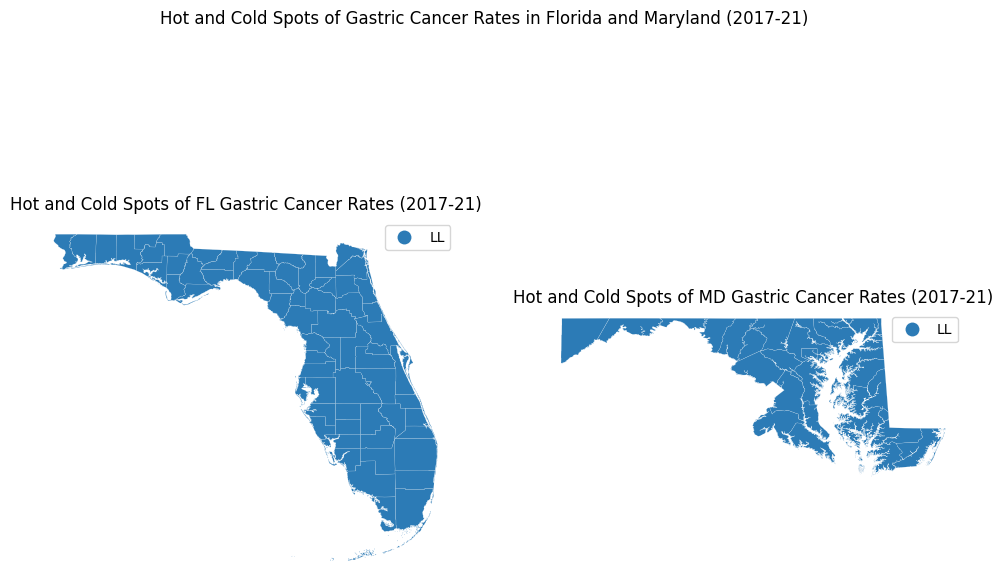

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

lisa_cluster(ax=axs[0],
             moran_loc = FL_ST_moran_local,
             gdf = FL_STcancer_gdf,
             p = 0.05,
             figsize = (12,8)
             )
axs[0].set_title("Hot and Cold Spots of FL Gastric Cancer Rates (2017-21)")

lisa_cluster(ax=axs[1],
             moran_loc = MD_ST_moran_local,
             gdf = MD_STcancer_gdf,
             p = 0.05,
             figsize = (12,8)
             )
axs[1].set_title("Hot and Cold Spots of MD Gastric Cancer Rates (2017-21)")

fig.suptitle('Hot and Cold Spots of Gastric Cancer Rates in Florida and Maryland (2017-21)')